# LinkedIn Friends

In [3]:
#import libraries
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings
from datetime import datetime
from collections import Counter
%matplotlib inline

In [4]:
#read graph object in pickle format
social = nx.read_gpickle('linkedin.gpickle')

In [5]:
#print summary of info for graph
print(nx.info(social))

Name: 
Type: Graph
Number of nodes: 30
Number of edges: 48
Average degree:   3.2000


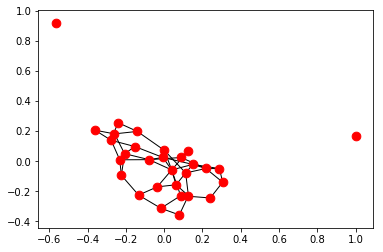

In [7]:
#draw network
nx.draw_networkx(social,node_color='r', node_size=75, with_labels=False)

In [8]:
#get the node attributes
social.nodes(data=True)

NodeDataView({0: {'age': 20, 'sex': 'Male'}, 1: {'age': 21, 'sex': 'Female'}, 2: {'age': 19, 'sex': 'Male'}, 3: {'age': 29, 'sex': 'Female'}, 4: {'age': 30, 'sex': 'Male'}, 5: {'age': 26, 'sex': 'Female'}, 6: {'age': 21, 'sex': 'Male'}, 7: {'age': 17, 'sex': 'Female'}, 8: {'age': 21, 'sex': 'Male'}, 9: {'age': 14, 'sex': 'Male'}, 10: {'age': 23, 'sex': 'Male'}, 11: {'age': 17, 'sex': 'Female'}, 12: {'age': 19, 'sex': 'Male'}, 13: {'age': 27, 'sex': 'Female'}, 14: {'age': 29, 'sex': 'Female'}, 15: {'age': 14, 'sex': 'Male'}, 16: {'age': 18, 'sex': 'Female'}, 17: {'age': 21, 'sex': 'Female'}, 18: {'age': 19, 'sex': 'Male'}, 19: {'age': 19, 'sex': 'Female'}, 20: {'age': 19, 'sex': 'Female'}, 21: {'age': 21, 'sex': 'Male'}, 22: {'age': 30, 'sex': 'Female'}, 23: {'age': 25, 'sex': 'Female'}, 24: {'age': 13, 'sex': 'Male'}, 25: {'age': 24, 'sex': 'Female'}, 26: {'age': 23, 'sex': 'Male'}, 27: {'age': 21, 'sex': 'Male'}, 28: {'age': 29, 'sex': 'Female'}, 29: {'age': 25, 'sex': 'Male'}})

In [9]:
#find the edge attributes
print (social.edges(data=True))

[(0, 10, {'date': datetime.datetime(2011, 6, 7, 0, 0)}), (0, 19, {'date': datetime.datetime(2011, 2, 12, 0, 0)}), (0, 12, {'date': datetime.datetime(2006, 8, 28, 0, 0)}), (1, 12, {'date': datetime.datetime(2003, 3, 17, 0, 0)}), (1, 2, {'date': datetime.datetime(2010, 8, 5, 0, 0)}), (1, 3, {'date': datetime.datetime(2005, 2, 3, 0, 0)}), (1, 4, {'date': datetime.datetime(2009, 11, 8, 0, 0)}), (1, 29, {'date': datetime.datetime(2005, 1, 15, 0, 0)}), (2, 16, {'date': datetime.datetime(2002, 5, 27, 0, 0)}), (2, 3, {'date': datetime.datetime(2009, 8, 13, 0, 0)}), (2, 6, {'date': datetime.datetime(2006, 1, 12, 0, 0)}), (2, 19, {'date': datetime.datetime(2010, 1, 6, 0, 0)}), (3, 8, {'date': datetime.datetime(2010, 6, 22, 0, 0)}), (3, 6, {'date': datetime.datetime(2009, 3, 20, 0, 0)}), (3, 23, {'date': datetime.datetime(2003, 11, 9, 0, 0)}), (4, 19, {'date': datetime.datetime(2007, 12, 4, 0, 0)}), (4, 28, {'date': datetime.datetime(2009, 5, 22, 0, 0)}), (6, 23, {'date': datetime.datetime(2011, 

# Question 1: Write a program that presents the range of dates (earliest and last dates) during which these relationships were forged? 

In [39]:
#get dates 
numEdges=len(social.edges(data=True))
listEdges=list(social.edges(data=True))

#loop through all edges and add dates to datesList
datesList = []
for i in range(0,numEdges):
    #print(i)
    datesList.append(listEdges[i][2]['date'])
#print(datesList)

#print min and max dates
print('Minimum date:',min(datesList))
print('Maximum date:',max(datesList))

# Question 2: Write a program that demonstrates if node 5 and 25 are friends (directly or indirectly)

In [50]:
#get nodes directly connected
print(nx.node_connected_component(social,5))
print(nx.node_connected_component(social,25),'\n')
print('Nodes 5 and 25 are not connected directly or indirectly (see plots and connected components below)')

{5}
{0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29} 

Nodes 5 and 25 are not connected directly or indirectly (see plots and connected components below)


In [43]:
#define function to create graph
def create_subgraph(G, node):
    edges = nx.dfs_successors(G, node)
    nodes = []
    for k,v in edges.items():
        nodes.extend([k])
        nodes.extend(v)
    return G.subgraph(nodes)

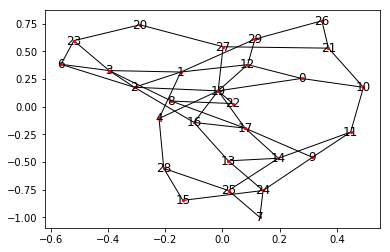

In [44]:
#plot of node 25
nx.draw_networkx(create_subgraph(social,25),with_labels = True,node_size=5)

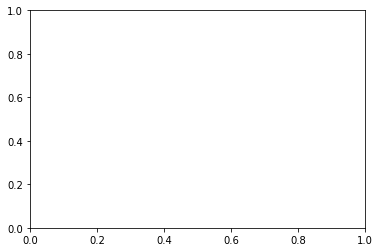

In [45]:
#plot node 5
nx.draw_networkx(create_subgraph(social,5),with_labels = True,node_size=5)

In [49]:
#print list of connected components
print(sorted(nx.connected_components(social), key = len, reverse=True),'\n')
print('The number of connected components:', nx.number_connected_components(social))

[{0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {5}, {18}] 

The number of connected components: 3


# Question 3: Write a program that lists direct friends of node 4

In [54]:
#get components directly connected to node 4
s = social.subgraph(nx.shortest_path(social.to_undirected(),4))
l = list(s.edges)
print('The direct friends of node 4 are:',[item for item in l if 4 in item])

The direct friends of node 4 are: [(1, 4), (4, 19), (4, 28)]


# Question 4: Write a program that presents the most popular person

In [61]:
#get number of edges adjacent to node
nodeList = list(nx.degree(social)) #node degree is the number of edges adjacent to the node
print(nodeList, '\n')
nodeSort = sorted(nodeList, key=lambda x: x[1]) #return max w/key=x[1]
print(nodeSort[29])

print('Node 19 has the most edges/direct connections')

[(0, 3), (1, 5), (2, 5), (3, 5), (4, 3), (5, 0), (6, 3), (7, 2), (8, 3), (9, 3), (10, 3), (11, 3), (12, 4), (13, 3), (14, 4), (15, 2), (16, 4), (17, 5), (18, 0), (19, 8), (20, 2), (21, 3), (22, 2), (23, 3), (24, 4), (25, 3), (26, 2), (27, 3), (28, 3), (29, 3)] 

(19, 8)
Node 19 has the most edges/direct connections
